In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 11

In [13]:
ls

churn-bigml-20.csv* churn-bigml-80.csv*


In [15]:
pwd

'/Users/henrikass/Downloads/jupiter-notebooks/archive'

In [16]:
telecom_df = pd.read_csv('./churn-bigml-80.csv')

In [18]:
telecom_df.head().T

0      1      2      3      4
State                      KS     OH     NJ     OH     OK
Account length            128    107    137     84     75
Area code                 415    415    415    408    415
International plan         No     No     No    Yes    Yes
Voice mail plan           Yes    Yes     No     No     No
Number vmail messages      25     26      0      0      0
Total day minutes       265.1  161.6  243.4  299.4  166.7
Total day calls           110    123    114     71    113
Total day charge        45.07  27.47  41.38   50.9  28.34
Total eve minutes       197.4  195.5  121.2   61.9  148.3
Total eve calls            99    103    110     88    122
Total eve charge        16.78  16.62   10.3   5.26  12.61
Total night minutes     244.7  254.4  162.6  196.9  186.9
Total night calls          91    103    104     89    121
Total night charge      11.01  11.45   7.32   8.86   8.41
Total intl minutes         10   13.7   12.2    6.6   10.1
Total intl calls            3      3      5      7      3
Total intl charge         2.7    3.7   3.29   1.78   2.73
Customer service calls      1      1      0      2      3
Churn                   False  False  False  False  False

In [19]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [21]:
telecom_df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [22]:
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [34]:
telecom_df['Total charge'] = telecom_df['Total day charge'] 
+ telecom_df['Total eve charge'] 
+ telecom_df['Total night charge'] 
+ telecom_df['Total intl charge']


0       2.70
1       3.70
2       3.29
3       1.78
4       2.73
        ... 
2661    3.19
2662    2.67
2663    2.59
2664    3.81
2665    3.70
Name: Total intl charge, Length: 2666, dtype: float64

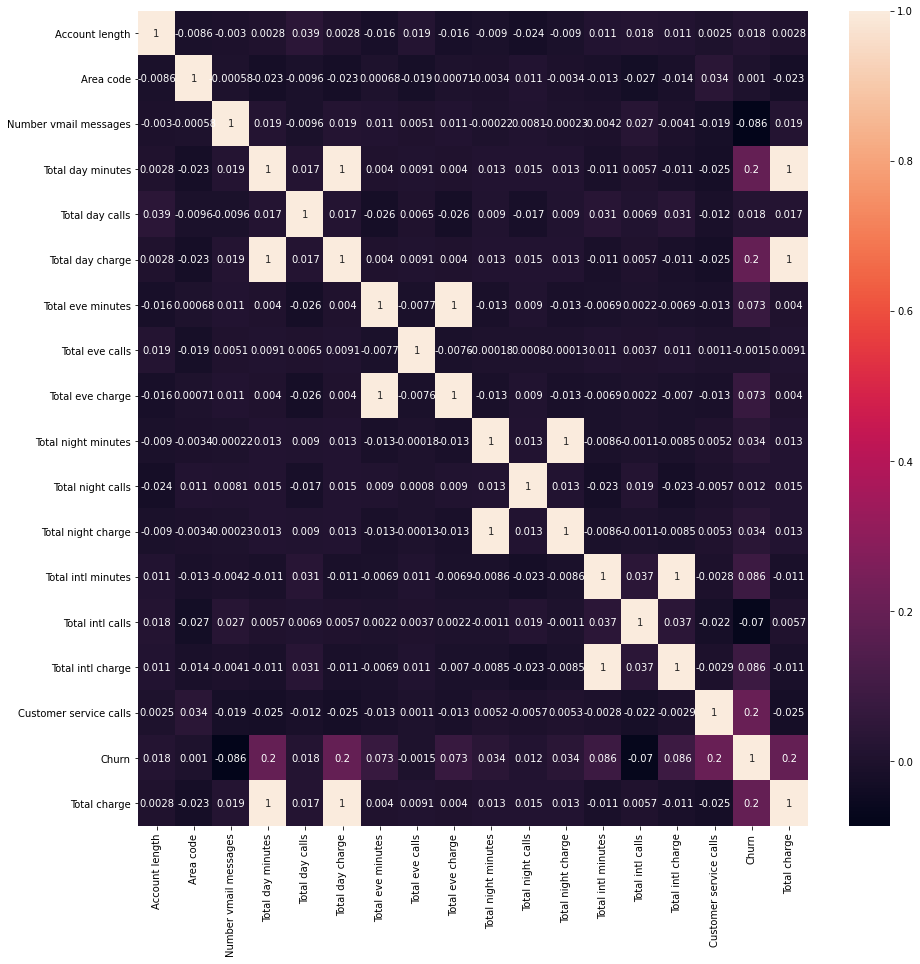

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(telecom_df.corr(), annot=True)

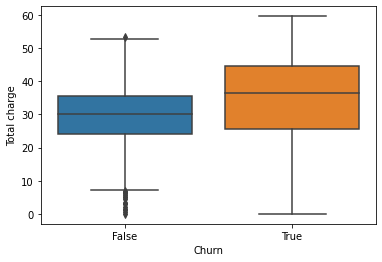

In [36]:
sns.boxplot(x='Churn',y='Total charge', data = telecom_df)

In [50]:
telecom_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

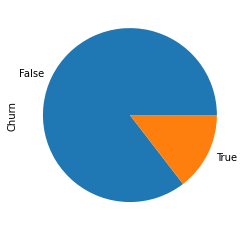

In [51]:
telecom_df['Churn'].value_counts().plot.pie()

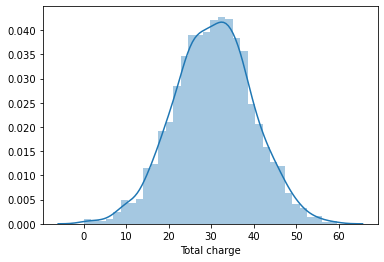

In [52]:
sns.distplot(telecom_df['Total charge'])

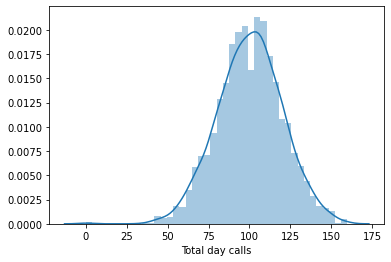

In [53]:
sns.distplot(telecom_df['Total day calls'])

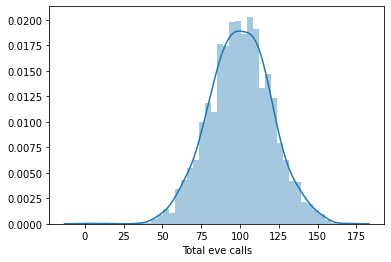

In [54]:
sns.distplot(telecom_df['Total eve calls'])

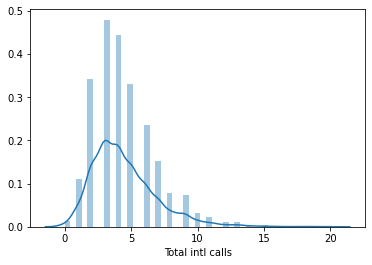

In [55]:
sns.distplot(telecom_df['Total intl calls'])

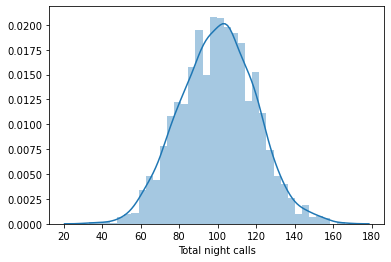

In [57]:
sns.distplot(telecom_df['Total night calls'])

In [62]:
telecom_df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls', 'Customer service calls'],
               ['Churn'], aggfunc='mean')

Customer service calls  Total day calls  Total eve calls  \
Churn                                                             
False                1.453029       100.159350       100.036435   
True                 2.206186       101.195876        99.948454   

       Total night calls  
Churn                     
False         100.007902  
True          100.682990

In [67]:
telecom_df["International plan"].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

In [71]:
telecom_df.pivot_table(['International plan'], ['Churn'], aggfunc='sum')

International plan
Churn                                                   
False  NoNoNoYesYesYesNoYesYesNoNoNoNoNoNoNoNoNoNoNoN...
True   NoNoYesNoNoNoNoNoNoNoNoNoYesNoNoNoYesNoNoYesYe...

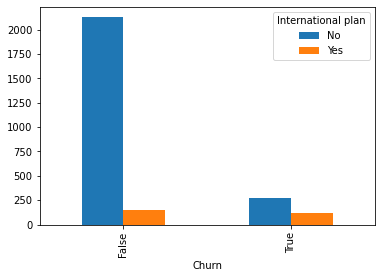

In [73]:
telecom_df.groupby(['Churn', 'International plan']).Churn.count().unstack().plot.bar(legend=True)

plt.show()

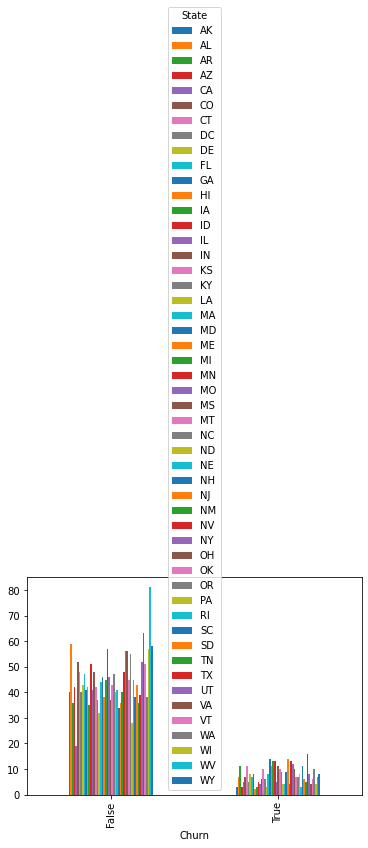

In [92]:
telecom_df.groupby(['Churn', 'State']).Churn.count().unstack().plot.bar()

plt.show()

In [82]:
telecom_df['Churn'].sum()

388

In [77]:
print('The percentage of customers churning from the company is: %{}'.format((telecom_df['Churn'].sum()) *100/telecom_df.shape[0]) )


The percentage of customers churning from the company is: %14.553638409602401


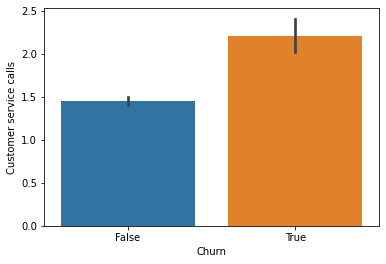

In [83]:
sns.barplot(x='Churn', y='Customer service calls',data=telecom_df)

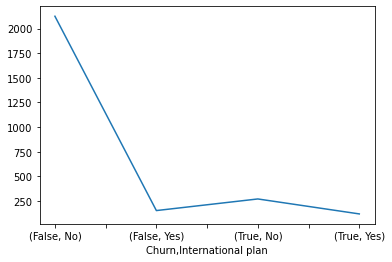

In [85]:
churn_intl = telecom_df.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()

In [86]:
telecom_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [87]:
churn_true = telecom_df.loc[telecom_df.Churn == True]

In [90]:
churn_true['State'].value_counts()

TX    16
MD    14
NJ    14
NV    13
MN    13
MI    13
NY    12
MS    11
CT    11
AR    11
SC    11
ME    11
MT    10
OH    10
KS    10
WA    10
NH     9
NC     9
UT     8
WY     8
PA     8
GA     8
DE     8
MA     8
OR     7
WV     7
OK     7
AL     7
FL     7
CO     7
VT     6
SD     6
IN     6
KY     6
TN     5
DC     5
CA     5
ID     5
MO     5
NM     4
ND     4
VA     4
NE     4
IL     4
WI     4
AK     3
IA     3
LA     3
RI     3
AZ     3
HI     2
Name: State, dtype: int64

In [99]:
churn_customer_calls = churn_true[churn_true['Churn'] & churn_true['Customer service calls']]

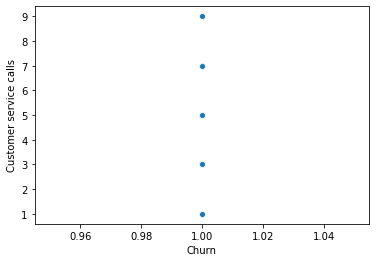

In [100]:
sns.scatterplot(x='Churn', y='Customer service calls', data=churn_customer_calls)

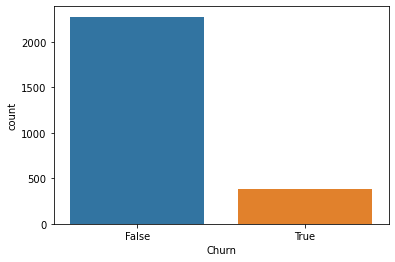

In [101]:
sns.countplot(telecom_df['Churn'])

In [111]:
feature_columns = telecom_df.columns.to_list()

In [113]:
feature_columns.remove('State')
feature_columns.remove('Churn')

In [114]:
telecom_df['Churn'] = telecom_df['Churn'].map({True:1,False:0})

In [116]:
telecom_df['International plan'].replace(['No','Yes'],[0,1],inplace=True)

In [117]:
telecom_df['Voice mail plan'].replace(['No','Yes'],[0,1],inplace=True)

In [118]:
feature_columns

['Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Total charge']

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


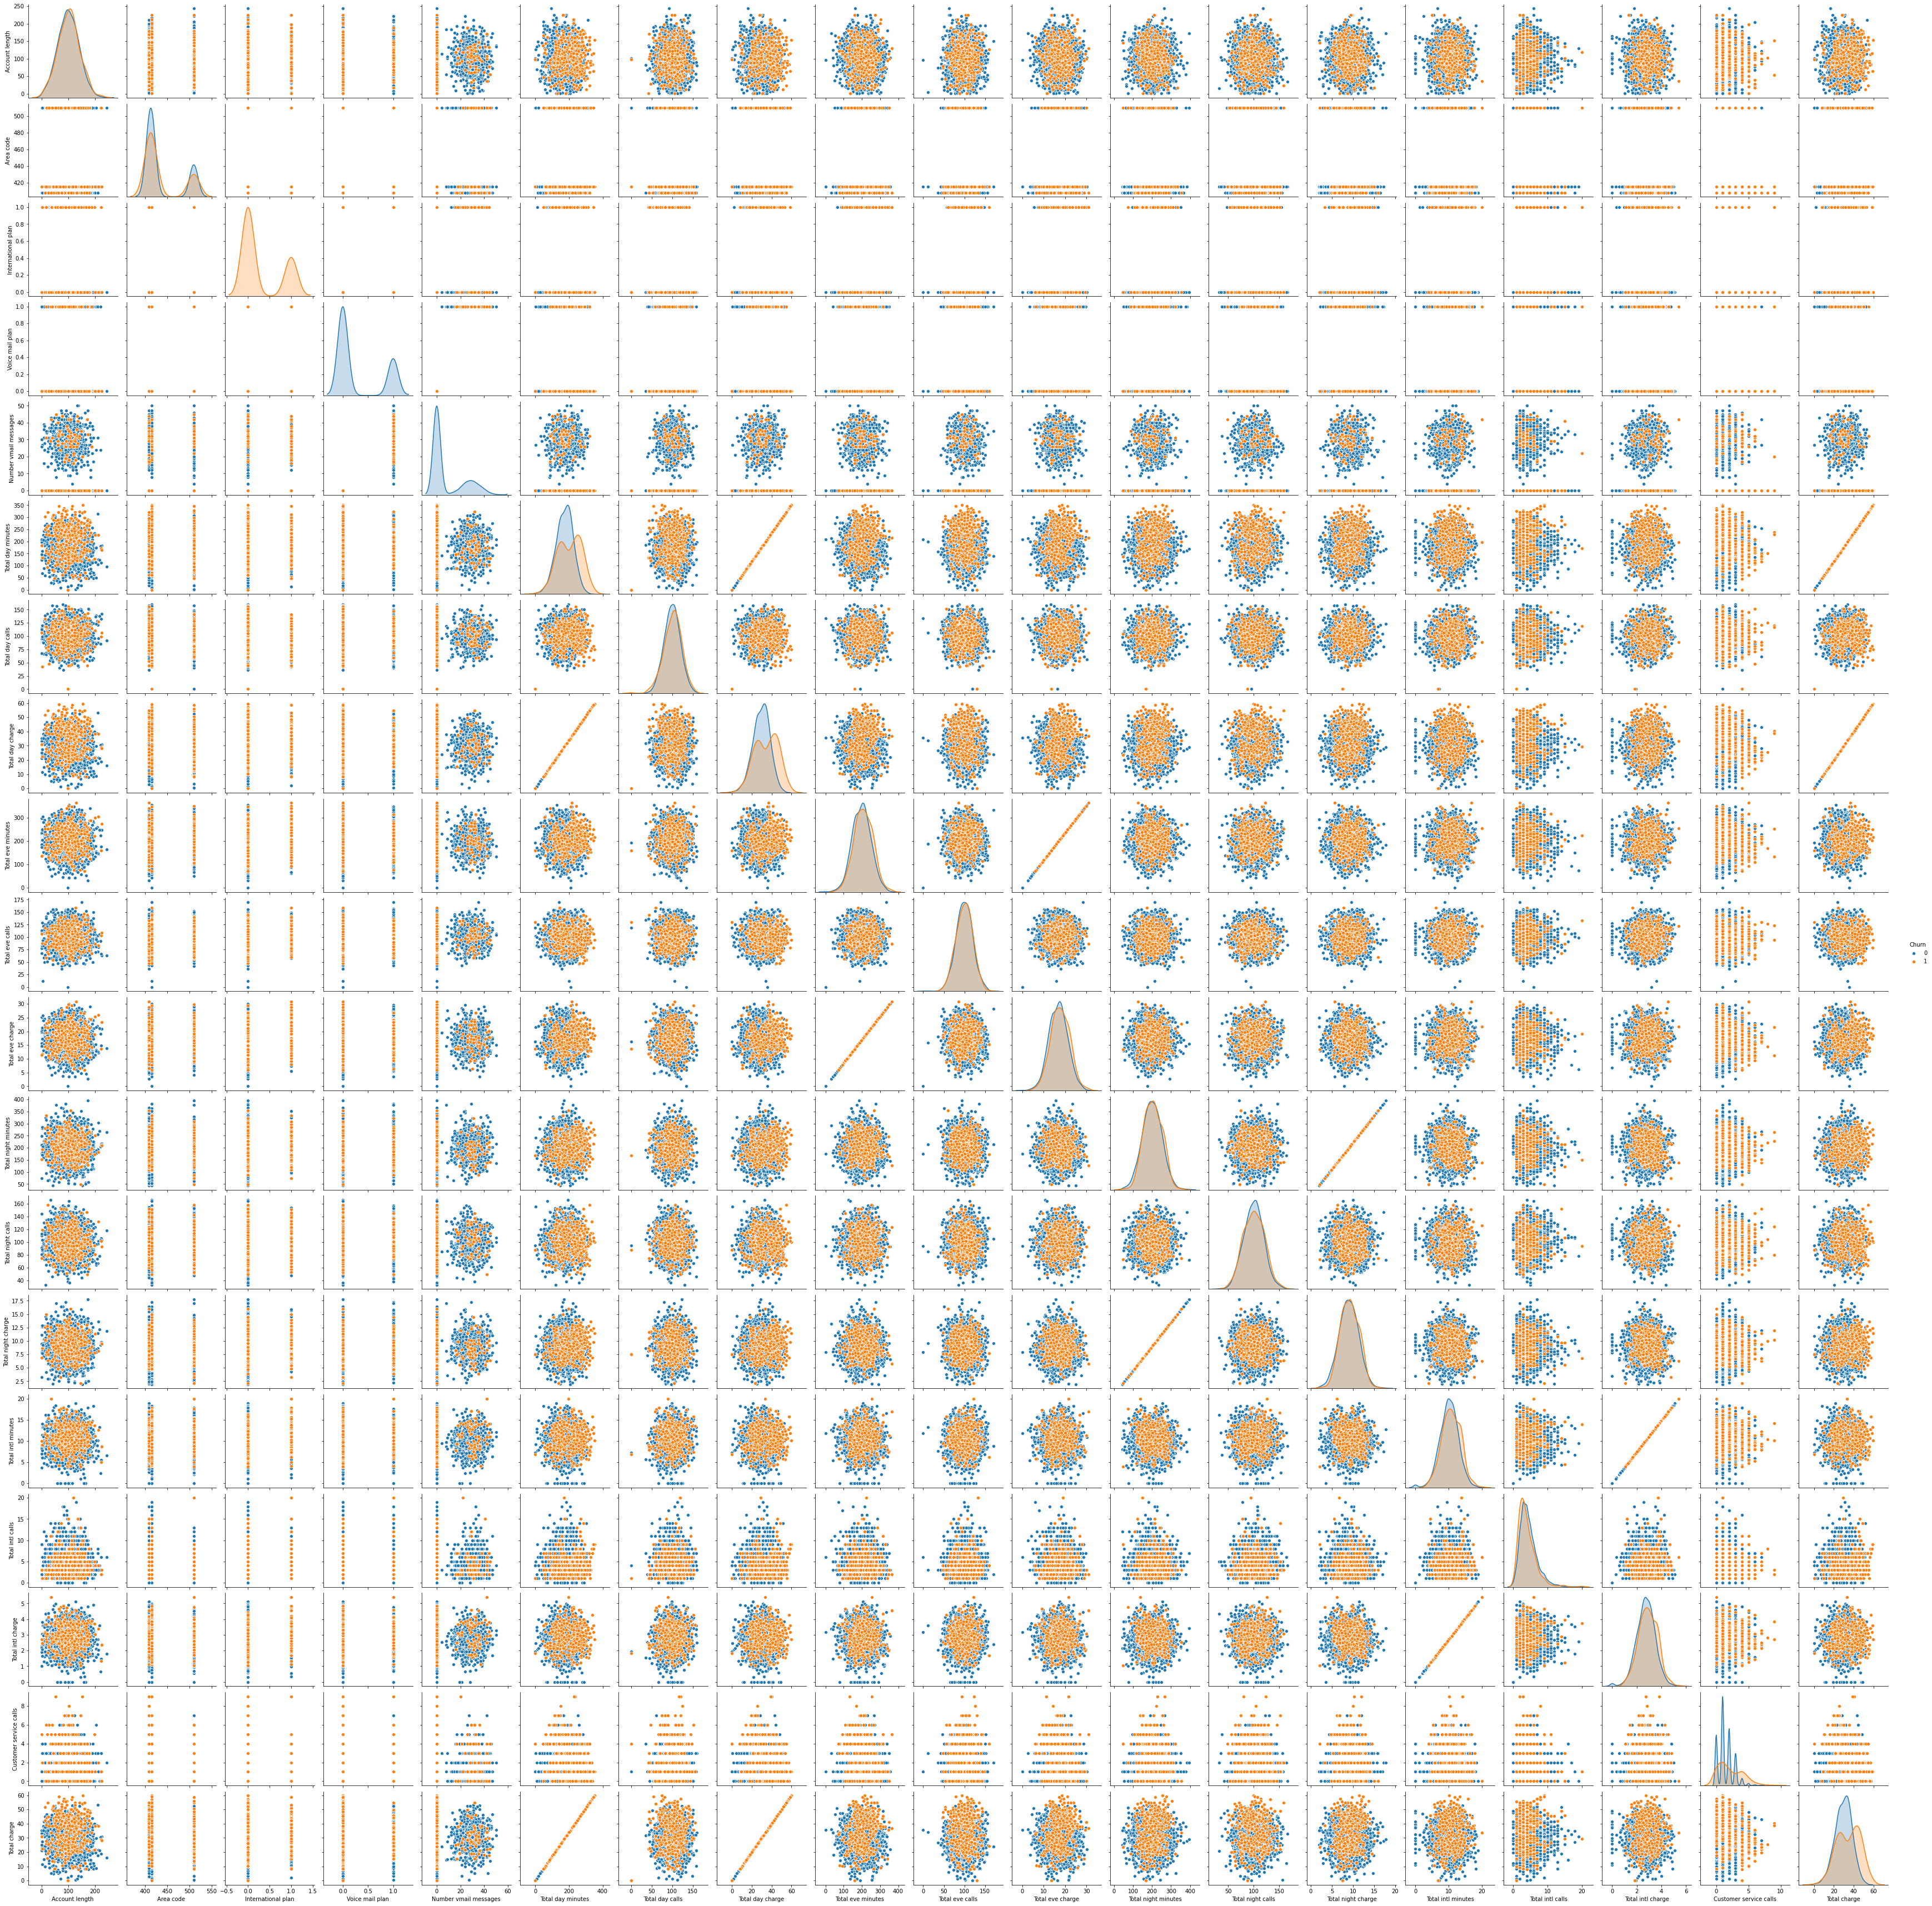

In [119]:
sns.pairplot(telecom_df, hue='Churn', vars=feature_columns)

In [120]:
important_columns = [
 'International plan',
 'Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge',
 'Customer service calls',
 'Total charge']

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


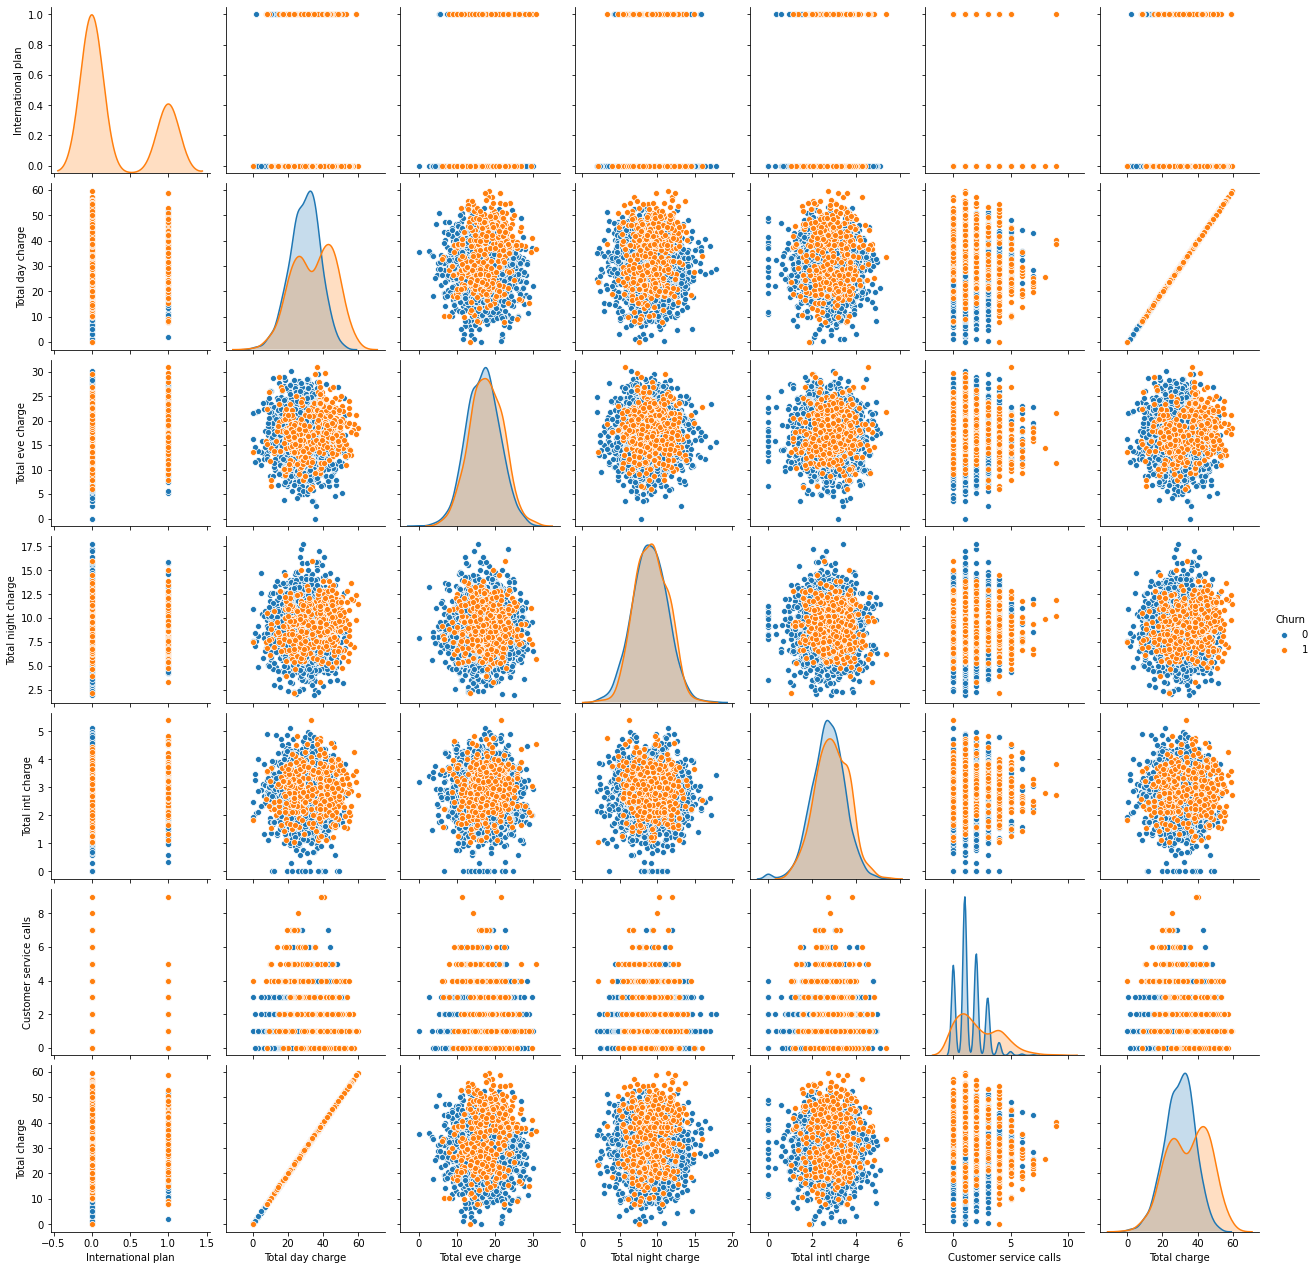

In [121]:
sns.pairplot(telecom_df, hue='Churn', vars=important_columns)

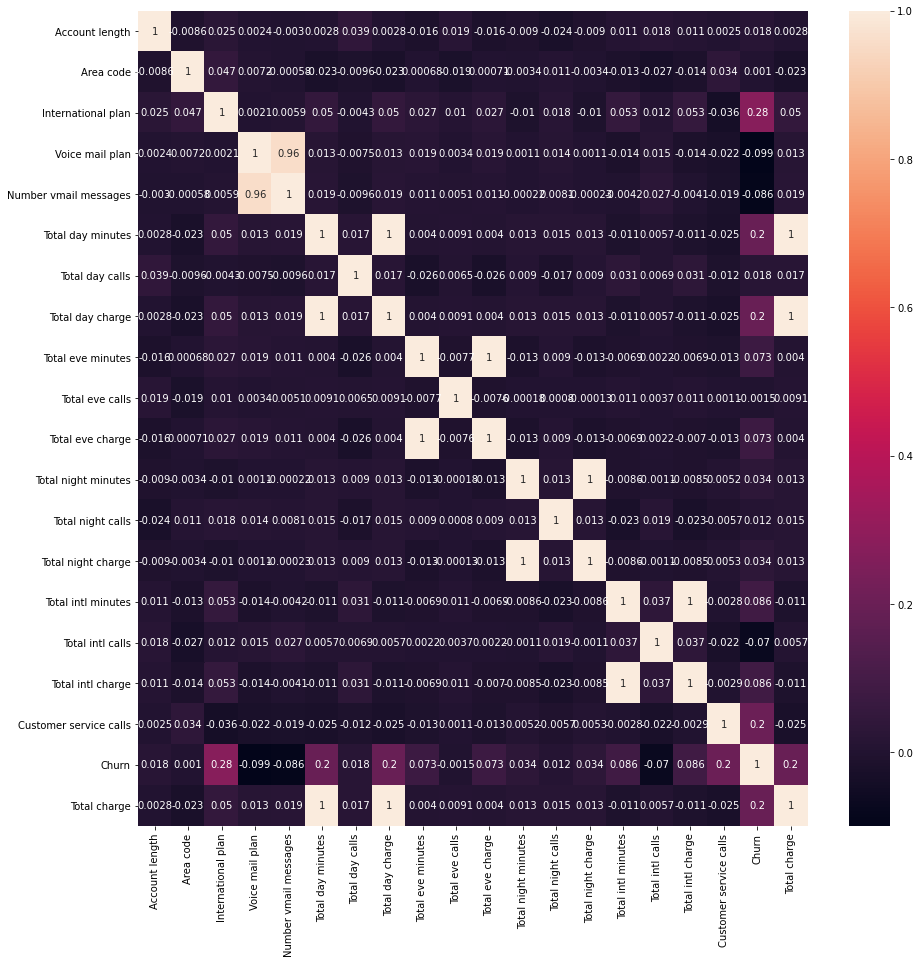

In [122]:
plt.figure(figsize=(15,15))
sns.heatmap(telecom_df.corr() , annot =True)

In [131]:
features = ['Total charge', 'Customer service calls', 'International plan']
X = telecom_df[features]
y = telecom_df['Churn']

In [132]:
X.head().T

0      1      2     3      4
Total charge            45.07  27.47  41.38  50.9  28.34
Customer service calls   1.00   1.00   0.00   2.0   3.00
International plan       0.00   0.00   0.00   1.0   1.00

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()

In [135]:
scaled_features = scaler.fit_transform(X)

In [136]:
df_features = pd.DataFrame(scaled_features, columns=features)
df_features.head().T

0         1         2         3         4
Total charge            1.579942 -0.330194  1.179465  2.212675 -0.235772
Customer service calls -0.429172 -0.429172 -1.191955  0.333610  1.096392
International plan     -0.335690 -0.335690 -0.335690  2.978938  2.978938

In [137]:
??StandardScaler

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [141]:
X_train.shape

(2132, 3)

In [142]:
X_val.shape

(534, 3)

In [143]:
y_train.shape

(2132,)

In [144]:
y_val.shape

(534,)

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [148]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.855089728401562
LDA 0.8470997323504893
KNN 0.8752621648896494
CART 0.8433614145934799
RF 0.8513250844631652
NB 0.8428919310254048
SVM 0.8611908209380896


In [149]:
from sklearn.model_selection import GridSearchCV

In [177]:
chosen_model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= chosen_model, param_grid=param, cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_neighbors': 5}


In [178]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train,y_train)
pred_val = best_model.predict(X_val)


In [158]:
from sklearn.metrics import accuracy_score

In [179]:
print(accuracy_score(y_val, pred_val))

0.8764044943820225


In [182]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [181]:
print(confusion_matrix(y_val, pred_val))

[[436  21]
 [ 45  32]]


In [183]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       457
           1       0.60      0.42      0.49        77

    accuracy                           0.88       534
   macro avg       0.76      0.68      0.71       534
weighted avg       0.86      0.88      0.87       534



In [188]:
rfc_gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        "n_estimators": np.linspace(10, 500, 3).astype(int),
        "min_samples_leaf": np.linspace(1, 100, 3).astype(int),
        "max_depth": np.linspace(10, 100, 3).astype(int),
        "max_features": ['sqrt', 'log2', 0.1],
    },
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [189]:
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 10,  55, 100]),
                         'max_features': ['sqrt', 'log2', 0.1],
                         'min_samples_leaf': array([  1,  50, 100]),
                         'n_estimators': array([ 10, 255, 500])},
             verbose=1)

In [190]:
rfc_gs.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 50,
 'n_estimators': 10}

In [191]:
rfc_gs.best_estimator_

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=50,
                       n_estimators=10)

In [196]:
rfc_gs.best_score_

0.8771228463678244

In [200]:
rfc_gs_val_preds = rfc_gs.predict(X_val)

In [201]:
print(confusion_matrix(y_val, rfc_gs_val_preds))

[[441  16]
 [ 63  14]]


In [202]:
print(classification_report(y_val, rfc_gs_val_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       457
           1       0.47      0.18      0.26        77

    accuracy                           0.85       534
   macro avg       0.67      0.57      0.59       534
weighted avg       0.82      0.85      0.82       534



In [227]:
telecom_df[feature_columns].head().T

0       1       2       3       4
Account length          128.00  107.00  137.00   84.00   75.00
Area code               415.00  415.00  415.00  408.00  415.00
International plan        0.00    0.00    0.00    1.00    1.00
Voice mail plan           1.00    1.00    0.00    0.00    0.00
Number vmail messages    25.00   26.00    0.00    0.00    0.00
Total day minutes       265.10  161.60  243.40  299.40  166.70
Total day calls         110.00  123.00  114.00   71.00  113.00
Total day charge         45.07   27.47   41.38   50.90   28.34
Total eve minutes       197.40  195.50  121.20   61.90  148.30
Total eve calls          99.00  103.00  110.00   88.00  122.00
Total eve charge         16.78   16.62   10.30    5.26   12.61
Total night minutes     244.70  254.40  162.60  196.90  186.90
Total night calls        91.00  103.00  104.00   89.00  121.00
Total night charge       11.01   11.45    7.32    8.86    8.41
Total intl minutes       10.00   13.70   12.20    6.60   10.10
Total intl calls          3.00    3.00    5.00    7.00    3.00
Total intl charge         2.70    3.70    3.29    1.78    2.73
Customer service calls    1.00    1.00    0.00    2.00    3.00
Total charge             45.07   27.47   41.38   50.90   28.34

Will try with all columns

In [229]:

X = telecom_df[feature_columns]
y = telecom_df['Churn']

In [233]:
scaled_features = scaler.fit_transform(X)

In [235]:
df_features = pd.DataFrame(scaled_features, columns=feature_columns)
df_features.head().T

0         1         2         3         4
Account length          0.692163  0.161278  0.919686 -0.420168 -0.647691
Area code              -0.527811 -0.527811 -0.527811 -0.692467 -0.527811
International plan     -0.335690 -0.335690 -0.335690  2.978938  2.978938
Voice mail plan         1.623917  1.623917 -0.615795 -0.615795 -0.615795
Number vmail messages   1.247508  1.320985 -0.589414 -0.589414 -0.589414
Total day minutes       1.579670 -0.329918  1.179302  2.212509 -0.235822
Total day calls         0.484868  1.135375  0.685024 -1.466653  0.634985
Total day charge        1.579942 -0.330194  1.179465  2.212675 -0.235772
Total eve minutes      -0.058619 -0.095916 -1.554439 -2.718509 -1.022461
Total eve calls        -0.050781  0.147654  0.494917 -0.596479  1.090224
Total eve charge       -0.058445 -0.095397 -1.554963 -2.718922 -1.021482
Total night minutes     0.857403  1.048458 -0.759668 -0.084083 -0.281046
Total night calls      -0.469031  0.149054  0.200561 -0.572045  1.076181
Total night charge      0.856707  1.049293 -0.758391 -0.084339 -0.281303
Total intl minutes     -0.085020  1.242179  0.704125 -1.304609 -0.049150
Total intl calls       -0.597527 -0.597527  0.216894  1.031314 -0.597527
Total intl charge      -0.085681  1.242921  0.698194 -1.307995 -0.045823
Customer service calls -0.429172 -0.429172 -1.191955  0.333610  1.096392
Total charge            1.579942 -0.330194  1.179465  2.212675 -0.235772

In [236]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

In [238]:
best_model = KNeighborsClassifier(n_neighbors=5)
best_model.fit(X_train,y_train)
pred_val = best_model.predict(X_val)



In [239]:
print(accuracy_score(y_val, pred_val))

0.8614232209737828


In [240]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       457
           1       0.56      0.19      0.29        77

    accuracy                           0.86       534
   macro avg       0.72      0.58      0.61       534
weighted avg       0.83      0.86      0.83       534

